In [1]:
! pip install qiskit
! pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.4/240.4 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 929.9/929.9 KB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 

In [9]:
from math import pi
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import QFT

In [7]:
# stuff to calculate
theta = pi/4

In [4]:
# build quantum register
n = 3
q1 = QuantumRegister(n,name = "counter")
q2 = QuantumRegister(1, name = "state")
c = ClassicalRegister(n)
qc = QuantumCircuit(q1,q2,c)

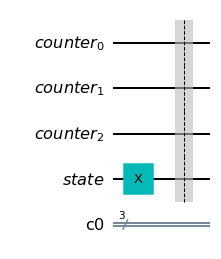

In [5]:
# build initial state
qc.x(q2[0])
qc.barrier()
qc.draw("mpl")

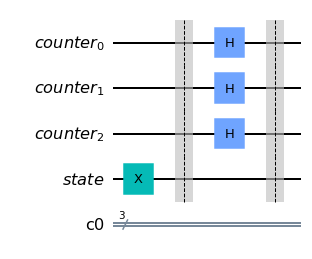

In [6]:
# apply hadamard gates to the ground registers
for i in range(n):
  qc.h(q1[i])
qc.barrier()
qc.draw("mpl")

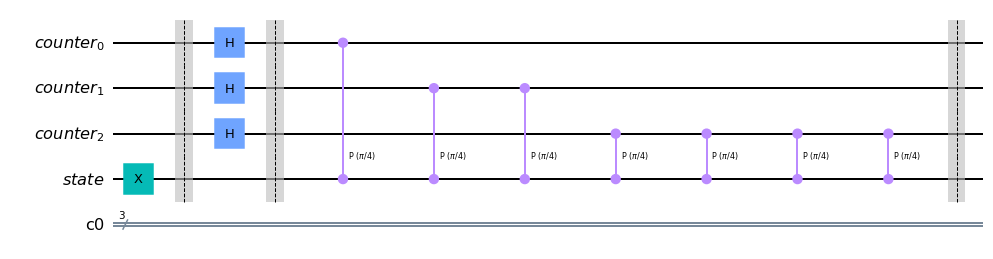

In [8]:
# apply cp gates 
reps = 1
for i in range(n):
  for j in range(reps):
    qc.cp(theta,q1[i],q2[0])
  reps *= 2
qc.barrier()
qc.draw("mpl")

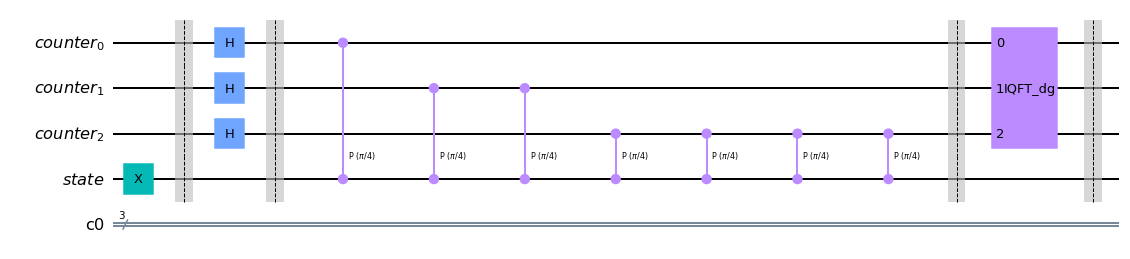

In [10]:
# apply inverse quantum fourier transformation in the ground states
in_qft = QFT(num_qubits=n,inverse=True)
qc = qc.compose(in_qft)
qc.barrier()
qc.draw("mpl")

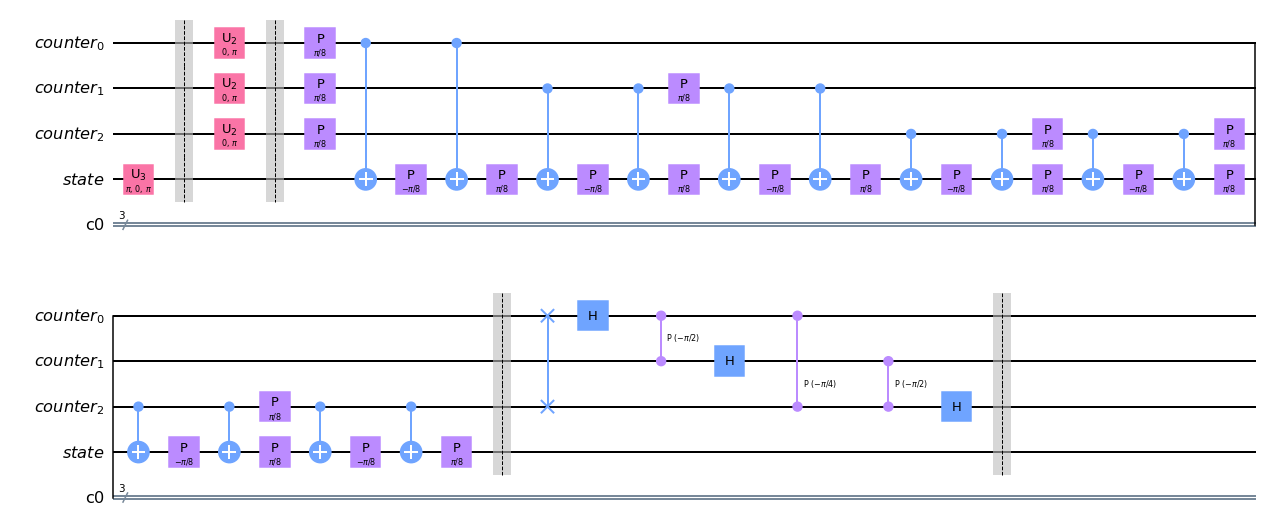

In [12]:
qc.decompose().draw("mpl")

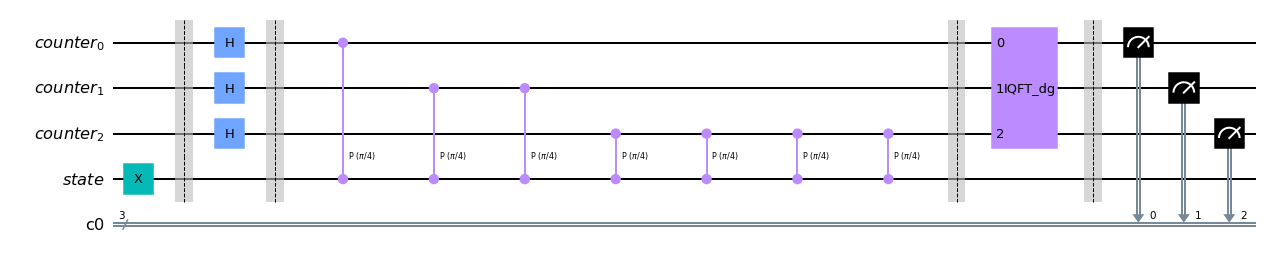

In [13]:
# measure the state of the quantum register
for i in range(n):
  qc.measure(q1[i],c[i])
qc.draw("mpl")

In [14]:
# simulate on an ideal quantum computer
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'001': 1024}


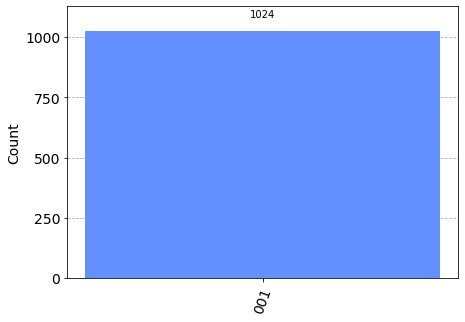

In [15]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [16]:
result = [key for key in counts.keys()]

In [17]:
result

['001']

In [18]:
result_dec = int(result[0],2)
result_dec

1

In [19]:
theta_cal = (result_dec * 2)/2**n
theta_cal

0.25

In [22]:
# simulate on a mock quantum computer
from qiskit.providers.fake_provider import FakeCasablanca
from qiskit.visualization import plot_error_map

In [23]:
device_simulator = FakeCasablanca()

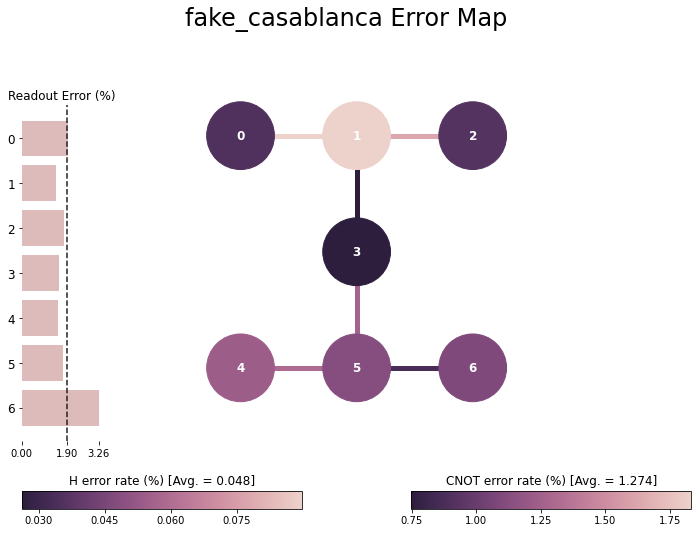

In [24]:
plot_error_map(device_simulator)

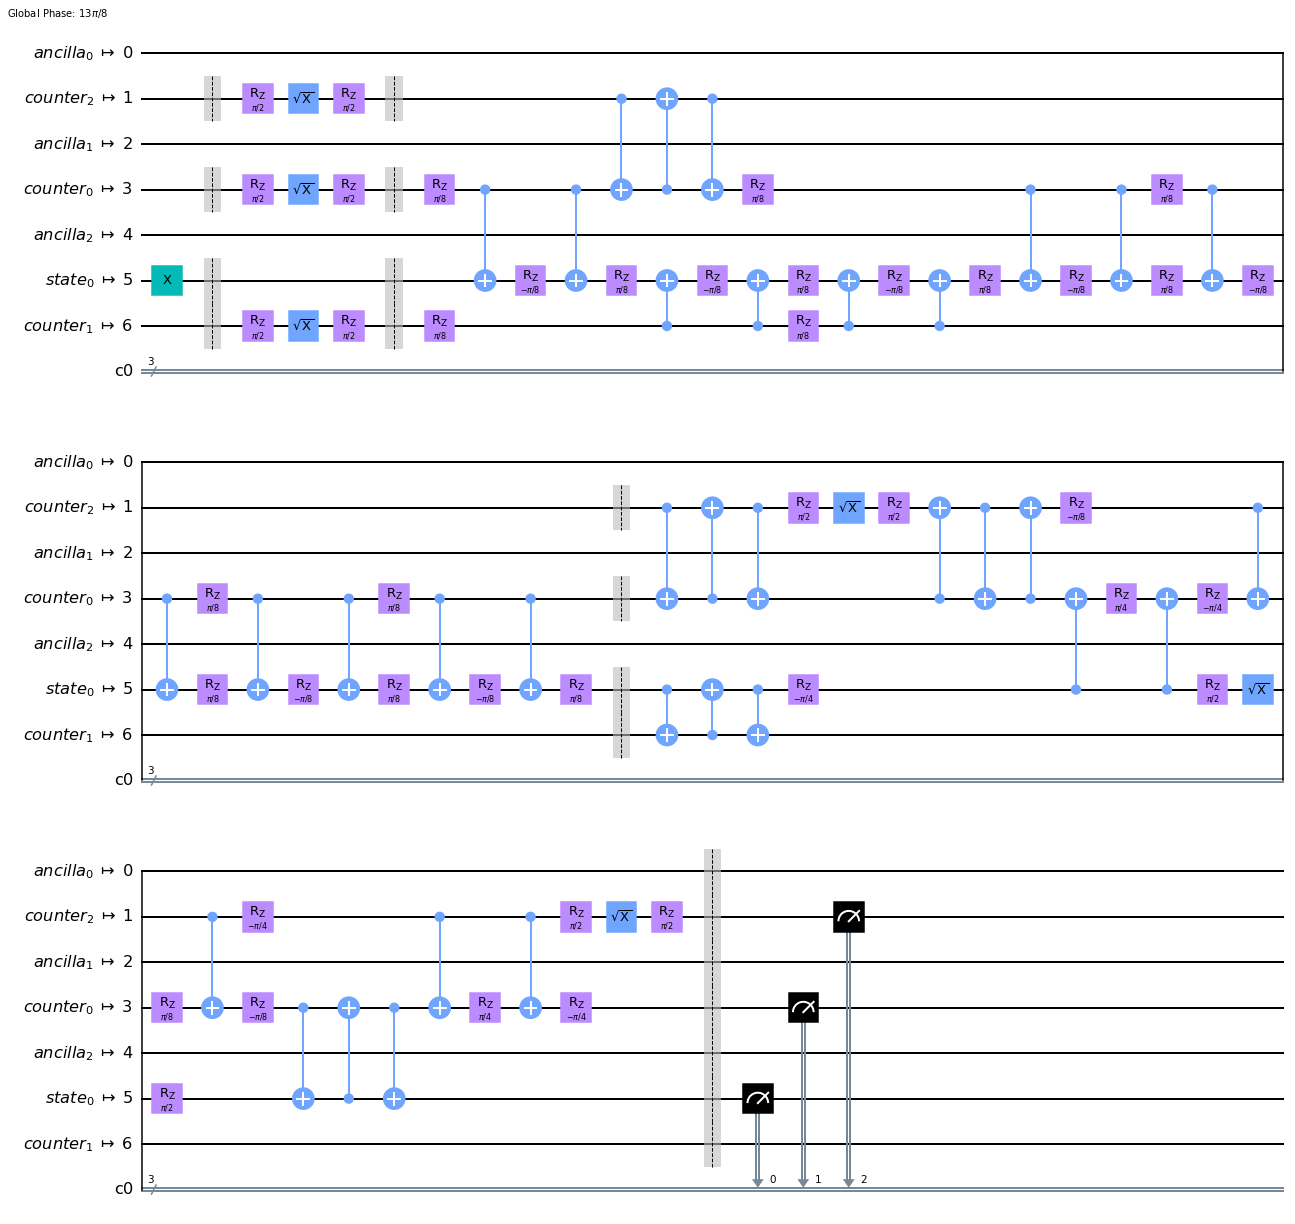

In [25]:
qc2 = transpile(qc,device_simulator)
qc2.draw("mpl")

In [26]:
qc.depth()

11

In [27]:
qc2.depth()

60

In [28]:
job = device_simulator.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'011': 9, '100': 1, '010': 1, '000': 32, '001': 971, '101': 10}


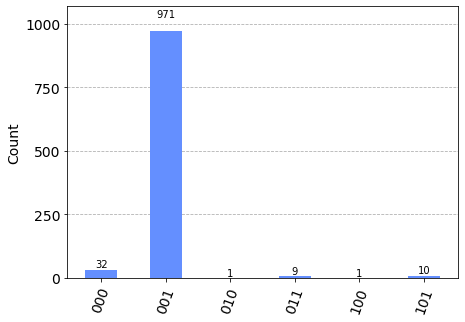

In [29]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)